In [133]:
# load libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel


from action_prediction import constants as const
from action_prediction.data import DataSet
from action_prediction import visualize as vis

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
# initialize dataset
data = DataSet(task='social_prediction')

#load confirmed participants
df_participants = pd.read_csv("../data/behavior/confirmed_participants.csv")
df_participants = df_participants[['public_id', 'paid_full', 'sex']]
df_participants['participant'] = df_participants['sex'].map({'M': 'male', 'F': 'female'})

# load behavior
df_behav = data.load_behav()
df_behav = df_behav.merge(df_participants, left_on='subj', right_on='public_id')

# load eyetracking
df_eye = data.load_eye(data_type='events')

# merge eyetracking with behav
df_merged = data.merge_behav_eye(dataframe_behav=df_behav, dataframe_eye=df_eye)

# #merge demographic data with behav/eyetracking
# df_merged = df_merged.merge(df_participants, left_on='subj', right_on='public_id')


In [73]:

# initialize plotting style
vis.plotting_style()


<Figure size 600x600 with 0 Axes>

##### Questions/relationships to explore

In [44]:
df_merged.columns

Index(['peak_velocity', 'amplitude', 'dispersion', 'start_gx', 'start_gy',
       'end_gx', 'end_gy', 'surface', 'end_time', 'type', 'duration',
       'mean_gx', 'mean_gy', 'block_iter', 'exp_event', 'task', 'event_type',
       'run_num', 'subtract', 'onset_sec', 'subj', 'sess', 'start_time',
       'actors', 'agents', 'angle', 'balance_exp', 'condition_name', 'context',
       'corr_key', 'corr_resp', 'dataset', 'display_trial_feedback',
       'extracted', 'feedback_type', 'hand', 'initiator',
       'initiator_start_frames', 'initiator_start_frames_corr',
       'initiator_start_frames_sec', 'interact_start_frames',
       'interact_start_frames_corr', 'interact_start_frames_sec', 'iti_dur',
       'label', 'media', 'real_start_time', 'replace_stimuli', 'resp_made',
       'rt', 'run_iter', 'session_type', 'stim', 'timestamp_sec', 'trial_dur',
       'trial_type', 'video_end', 'video_name', 'video_name_corrected',
       'video_start', 'block_iter_corr', 'public_id', 'paid_full', 

In [114]:
df_merged['label'].unique()

array(['handShake', 'hug'], dtype=object)

In [46]:
df_merged.columns
df_merged.block_iter_corr.unique()


array(['run01_block1', 'run01_block2', 'run01_block3', 'run02_block1',
       'run02_block2', 'run02_block3', 'run03_block1', 'run03_block2',
       'run03_block3', 'run04_block1', 'run04_block2', 'run04_block3',
       'run05_block1', 'run05_block2', 'run05_block3', 'run06_block1',
       'run06_block2', 'run06_block3', 'run07_block1', 'run07_block2',
       'run07_block3', 'run08_block1', 'run08_block2', 'run08_block3',
       'run09_block1', 'run09_block2', 'run09_block3', 'run10_block1',
       'run10_block2', 'run10_block3', 'run11_block1', 'run11_block2',
       'run11_block3', 'run12_block1', 'run12_block2', 'run12_block3',
       'run13_block1', 'run13_block2', 'run13_block3', 'run14_block1',
       'run14_block2', 'run14_block3'], dtype=object)

# Fig. 5

### Fig. 5A-  Average Accuracy by Session Number


No handles with labels found to put in legend.


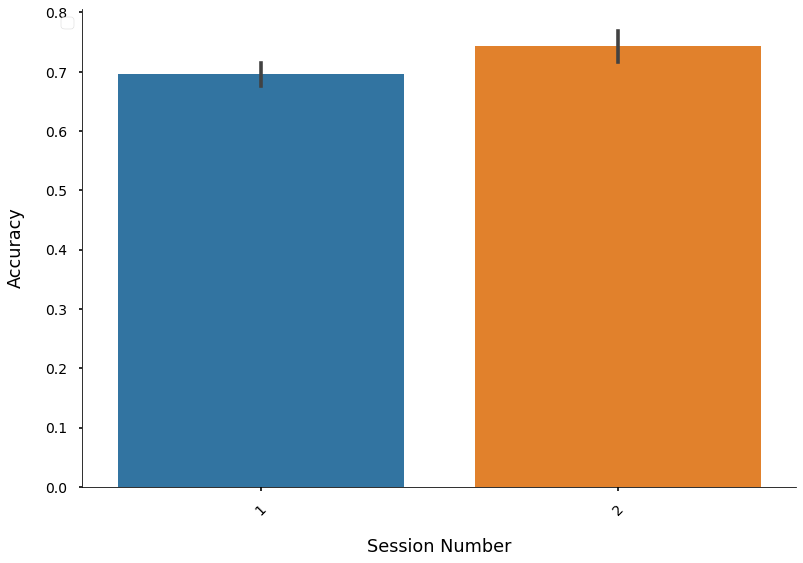

In [352]:

fig5A= vis.plot_acc(dataframe=df_sess, x='sess', hue = None,
                    x_title = "Session Number", save_title = "Fig5A.png")

### T-test of significance for accuracy differences between sess1 and sess2 across all participants

In [354]:
# group by whichever variables you are interested
# run a T-test
# let's first run a T-test (i.e. one-way ANOVA on RT diff between patient and control)
df_sess = df_merged.groupby(['subj', 'sess'])['corr_resp'].mean().reset_index()
sess1_acc = df_sess.query('sess == 1')['corr_resp']
sess2_acc = df_sess.query('sess == 2')['corr_resp']
t, p = ttest_ind(sess1_acc, sess2_acc)
print(f't(21)={t}, p={p}') 

t(21)=-2.818418171589711, p=0.007396091061108679


In [348]:
#df_sess

### Fig 5B. Accuracy across runs by condition. Dashed line denotes start of session 2.


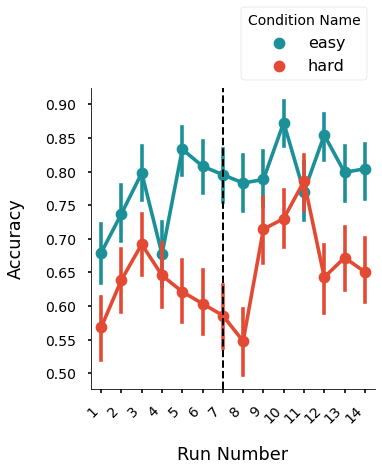

In [373]:

vis.plot_acc(dataframe=df_behav, x='run_num', 
                    hue= 'condition_name', hue_order = ['easy', 'hard'], palette = ['#1c9099', '#e34a33'],
                    x_title= "Run Number", legend_title = "Condition Name", save_title = 'Fig5B.png')


In [351]:
#df_grouped

### Fig 5C. Average accuracy by condition name. 


No handles with labels found to put in legend.


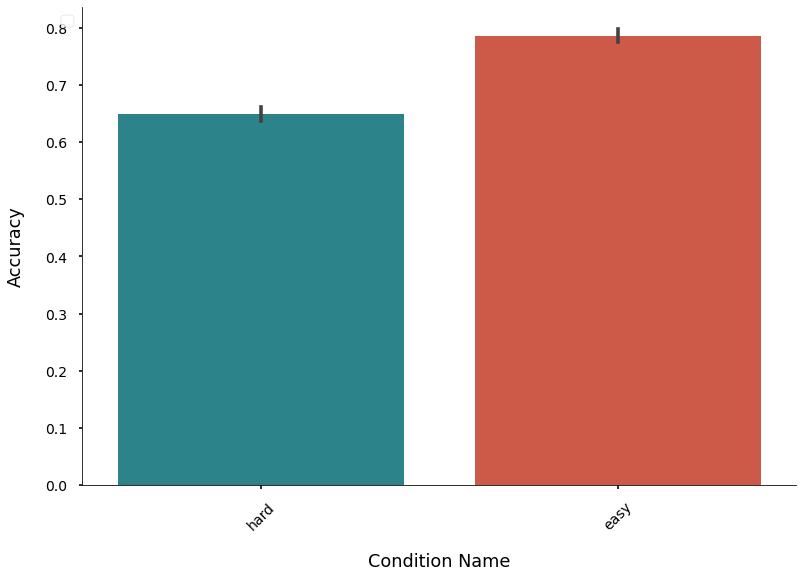

In [372]:
vis.plot_acc(dataframe=df_behav, x='condition_name', hue_order = ['easy', 'hard'], palette = ['#1c9099', '#e34a33'],
                    x_title= "Condition Name", save_title = 'fig5C.png')                         

### T-test of significance for accuracy differences between easy and hard conditions across all participants

In [104]:
import pandas as pd
from scipy.stats import ttest_ind
# group by whichever variables you are interested
df_grouped = df_merged.groupby(['subj', 'condition_name'])['corr_resp'].mean().reset_index()
# run a T-test
# let's first run a T-test (i.e. one-way ANOVA on RT diff between patient and control)
easy_acc = df_grouped.query('condition_name=="easy"')['corr_resp']
hard_acc = df_grouped.query('condition_name=="hard"')['corr_resp']
t, p = ttest_ind(easy_acc, hard_acc)
print(f't(20)={t}, p={p}')

t(20)=7.639137260297062, p=1.7963828982136483e-09


In [359]:
#sess1_rt

# Fig. 6

### Fig. 6A-  Average Fixation Counts across runs. Dashed line denotes start of session 2.

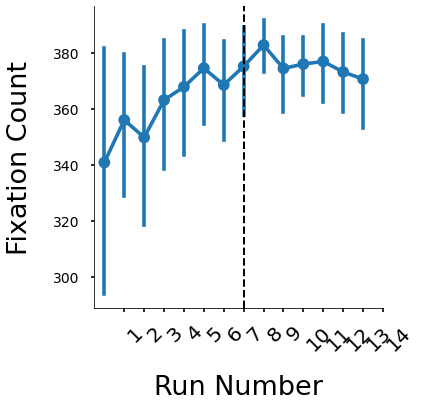

In [366]:
vis.plot_fixation_count(df_merged, x='run_num', hue=None, x_title = "Run Number", fig_title = None, save_title = "fig6A.png")
                                
                                

### T-test of significance for fixation count differences between session 1 and session 2.

In [365]:
df_fixcount = df_merged.groupby(['subj','sess', 'type'])["type"].count().reset_index(name='count').query('type=="fixations"')
df_fixcount
sess1_fix = df_fixcount.query('sess == 1')['count']
sess2_fix = df_fixcount.query('sess == 2')['count']
t, p = ttest_ind(sess1_fix, sess2_fix)
print(f't(21)={t}, p={p}') 

t(21)=-1.232178789150228, p=0.22633577533584956


### Fig. 6B-  Fixation Durations over Runs. Dashed line denotes start of session 2.

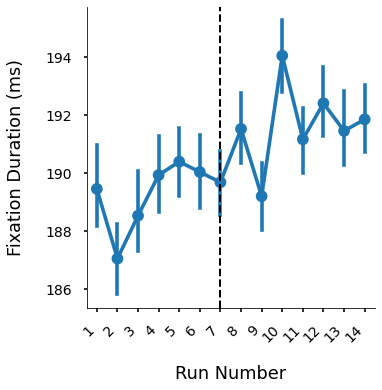

In [374]:
vis.plot_fixation_duration(df_merged, x='run_num', hue=None, x_title ="Run Number", fig_title = None, 
                           save_title = 'fig6B.png')




### T-test of significance for fixation duration differences between session 1 and session 2

In [285]:
df_fixdur = df_merged.query('type=="fixations"').groupby(['subj','sess'])['duration'].mean().reset_index()
df_fixdur
sess1_fixdur = df_fixdur.query('sess == 1')['duration']
sess2_fixdur = df_fixdur.query('sess == 2')['duration']
t, p = ttest_ind(sess1_fixdur, sess2_fixdur)
print(f't(21)={t}, p={p}') 

t(21)=-1.0386878686254426, p=0.30628059341617764


# Fig 7

### EXAMPLE: Two-way repeated measure ANOVA

In [307]:
df_plant=pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/plants_leaves_two_within.csv")
from statsmodels.stats.anova import AnovaRM
res=AnovaRM(data=df, depvar='num_leaves', within=['time', 'year'], subject='plants')
print(res.fit())

                 Anova
          F Value  Num DF  Den DF Pr > F
----------------------------------------
time      158.6573 4.0000 16.0000 0.0000
year        3.6000 1.0000  4.0000 0.1306
time:year   1.4545 4.0000 16.0000 0.2621



In [89]:
df_behav["initiator_condition_name"]= df_behav["initiator"] + "_" + df_behav["condition_name"] 
df_merged["initiator_condition_name"]= df_merged["initiator"] + "_" + df_merged["condition_name"] 
#can use this method for combining variable conditions across any column

df_behav["initiator_label"]= df_behav["initiator"] + "_" + df_behav["label"] 
df_merged["initiator_label"]= df_merged["initiator"] + "_" + df_merged["label"] 

## Fig. 7A: Accuracy by Label and Condition Name

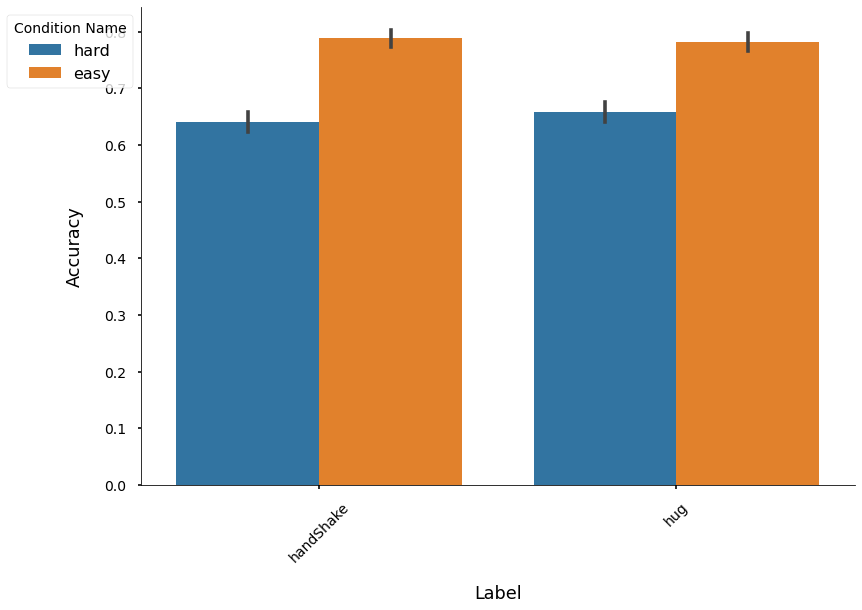

In [370]:
vis.plot_acc(dataframe=df_behav, x='label', hue= "condition_name", x_title = "Label", legend_title = "Condition Name", save_title = "fig7A.png", hue_order = ["easy", "hard"])
#more of a control result, make figure with control results (ex. no accuracy/ rt tradeoff)

In [312]:
df_lab_cond = df_merged.groupby(['subj', 'label', 'condition_name'])['corr_resp'].mean().reset_index()

#df_lab_cond


### Two-way repeated measure ANOVA
IV: Accuracy

DV: label, condition_name

In [369]:
res_lab_cond = AnovaRM(data=df_lab_cond, depvar='corr_resp', within=['label', 'condition_name'], subject='subj')
print(res_lab_cond.fit())

                       Anova
                     F Value  Num DF  Den DF Pr > F
---------------------------------------------------
label                  0.1671 1.0000 21.0000 0.6869
condition_name       120.6313 1.0000 21.0000 0.0000
label:condition_name   2.8587 1.0000 21.0000 0.1057





### ALTERNATIVE: Two-way (factorial design) ANOVA 
IV: Accuracy

DV: label, condition_name

In [313]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
df_lab_cond = df_merged.groupby(['subj', 'label', 'condition_name'])['corr_resp'].mean().reset_index()
lab_cond_model = ols('corr_resp ~ C(label) + C(condition_name) + C(label):C(condition_name)', data=df_lab_cond).fit()
anova_lab_cond = sm.stats.anova_lm(lab_cond_model, typ=2)
anova_lab_cond


,sum_sq,df,F,PR(>F)
C(label),0.000838,1.0,0.156560,6.933467e-01
C(condition_name),0.423470,1.0,79.106755,9.690259e-14
C(label):C(condition_name),0.005375,1.0,1.004132,3.191907e-01
Residual,0.449664,84.0,NaN,NaN


##  Fig. 7B- Accuracy by Label and Initiator

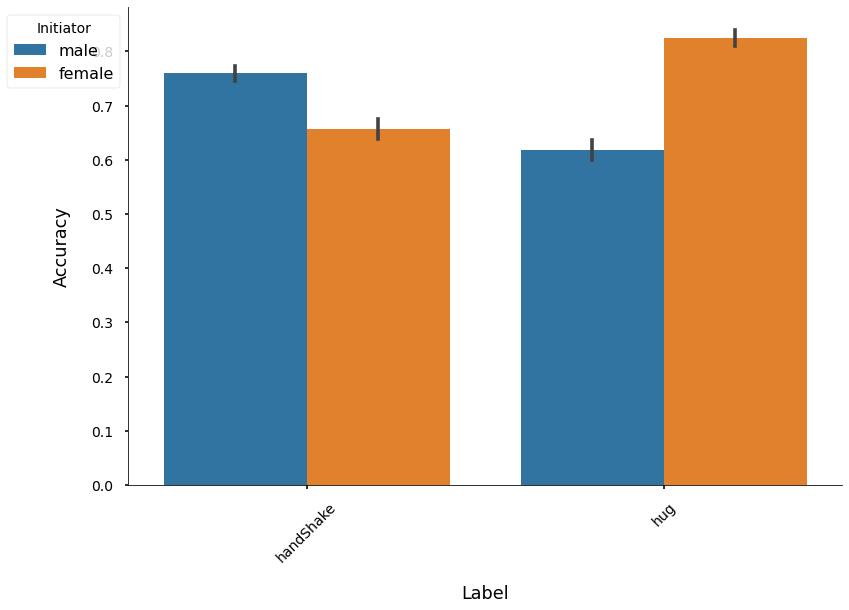

In [375]:
#Fig 3B.2
vis.plot_acc(dataframe=df_behav, x='label', hue= "initiator", x_title = "Label", legend_title = "Initiator", save_title = "fig7B.png", hue_order = None)
#more of a control result, make figure with control results (ex. no accuracy/ rt tradeoff)

In [309]:
df_lab_init = df_merged.groupby(['subj', 'label', 'initiator'])['corr_resp'].mean().reset_index()
#df_lab_init

## Two-way repeated measure ANOVA
IV: Accuracy

DV: label, initiator

In [308]:
res_lab_init = AnovaRM(data=df_lab_init, depvar='corr_resp', within=['label', 'initiator'], subject='subj')
print(res_lab_init.fit())


                    Anova
                F Value  Num DF  Den DF Pr > F
----------------------------------------------
label             0.8687 1.0000 21.0000 0.3619
initiator        26.8448 1.0000 21.0000 0.0000
label:initiator 145.9981 1.0000 21.0000 0.0000



### ALTERNATIVE: Two-way (factorial design) ANOVA 
IV: Accuracy

DV: label, initiator


In [306]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
lab_init_model = ols('corr_resp ~ C(label) + C(initiator) + C(label):C(initiator)', data=df_lab_init).fit()
anova_lab_init = sm.stats.anova_lm(lab_init_model, typ=2)
anova_lab_init


,sum_sq,df,F,PR(>F)
C(label),0.004512,1.0,0.796642,3.746490e-01
C(initiator),0.083624,1.0,14.764118,2.358520e-04
C(label):C(initiator),0.467230,1.0,82.490836,4.048874e-14
Residual,0.475778,84.0,NaN,NaN


# Fig. 8

### Fig 8- Fixation Count by Label and Initiator

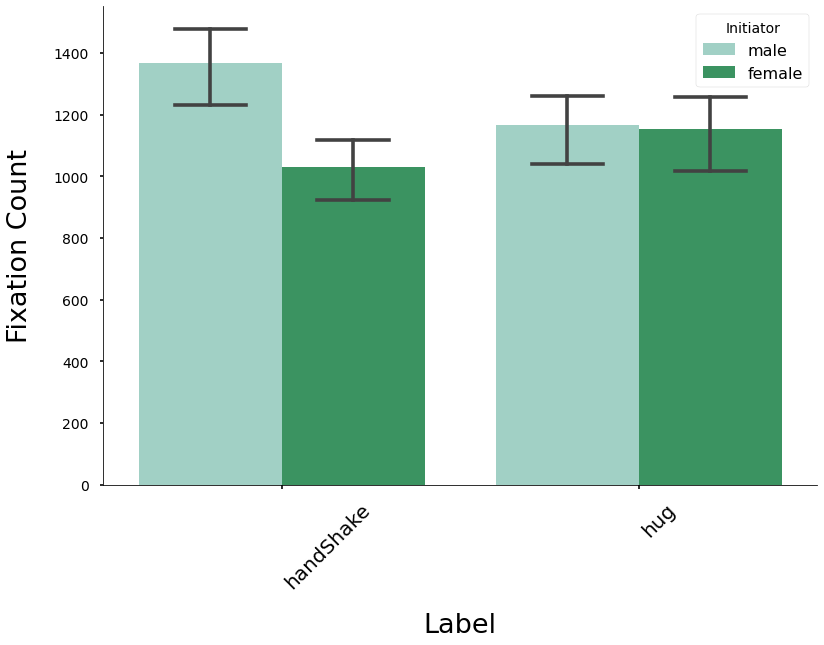

In [376]:
vis.plot_fixation_count(dataframe=df_merged, x='label', x_title='Label', hue= "initiator", legend_title='Initiator', hue_order=['male', 'female'], save_title = "posterfig3.png", palette = ['#99d8c9', '#2ca25f'])


In [318]:
df_fix_lab_init = df_merged.groupby(['subj', 'type', 'label', 'initiator'])["type"].count().reset_index(name='count').query('type =="fixations"') 
#df_fix_lab_init 

## Two-way repeated measure ANOVA
IV: Fixation count

DV: label, initiator

In [319]:
res_fix_lab_init = AnovaRM(data=df_fix_lab_init, depvar='count', within=['label', 'initiator'], subject='subj')
print(res_fix_lab_init.fit())

                    Anova
                F Value  Num DF  Den DF Pr > F
----------------------------------------------
label            48.7068 1.0000 18.0000 0.0000
initiator       385.2561 1.0000 18.0000 0.0000
label:initiator 192.7306 1.0000 18.0000 0.0000



# Fig. 9

### Fig. 9A- Accuracy vs. Initiator and Participant Gender

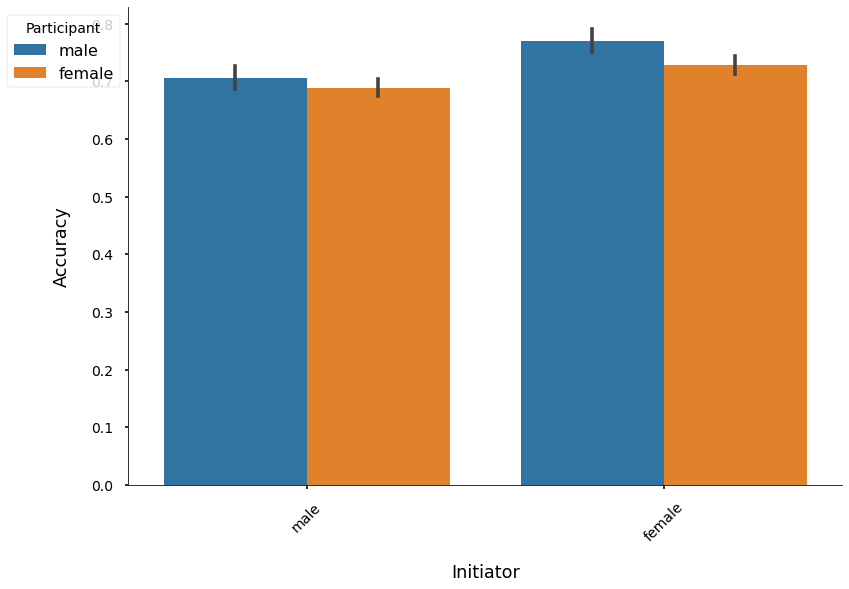

In [378]:
vis.plot_acc(dataframe=df_behav, x='initiator', hue= "participant", hue_order=['male','female'], x_title = "Initiator", legend_title = "Participant", save_title = "fig9A.png")
#more of a control result, make figure with control results (ex. no accuracy/ rt tradeoff)

### Fig 9B- Accuracy vs. Initiator, Label, and Participant Gender

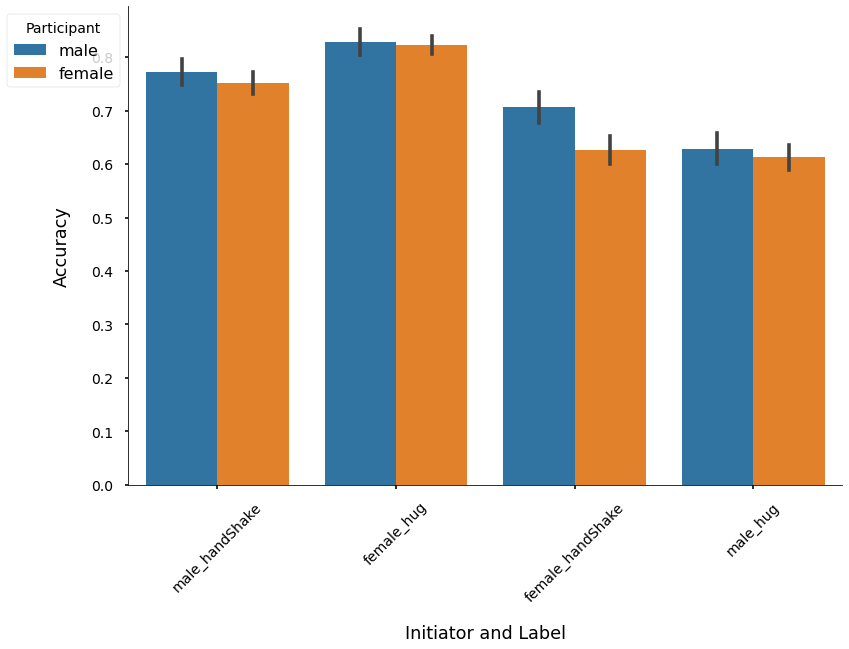

In [377]:

vis.plot_acc(dataframe=df_behav, x='initiator_label', hue= "participant", x_title = "Initiator and Label", legend_title = "Participant", save_title = "fig9B.png")


# Supplementary Figures

# Suppl. Fig. 1

### Suppl. Fig. 1A- Reaction Time Across Runs. Dashed line denotes start of session 2.

No handles with labels found to put in legend.


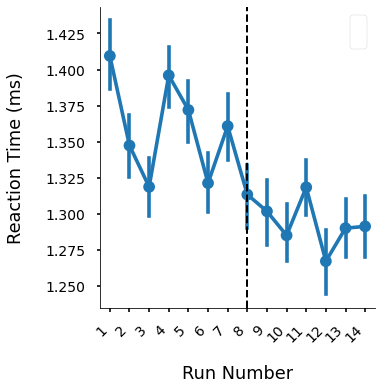

In [380]:
vis.plot_rt(dataframe=df_behav, x='run_num', hue= None, 
                   x_title= "Run Number", save_title = 'supp_fig1A.png', fig_title = None)

### T-test of significance for reaction time differences between sess1 and sess2 across all participants

In [358]:
df_rt = df_merged.groupby(['subj', 'sess'])['rt'].mean().reset_index()
sess1_rt = df_rt.query('sess == 1')['rt']
sess2_rt = df_rt.query('sess == 2')['rt']
t, p = ttest_ind(sess1_rt, sess2_rt)
print(f't(21)={t}, p={p}') 

t(21)=2.5674862138271397, p=0.013988262871575117


### Suppl. Fig. 1B- Accuracy by Reaction Time (ms)

In [360]:
#df_rt_acc = df_merged.groupby(['subj', 'sess']).agg({'rt': 'mean', 'corr_resp': 'mean'}).reset_index(drop=True)
#df_rt_acc
#np.corrcoef(df_rt_acc['corr_resp'], df_rt_acc['rt'])

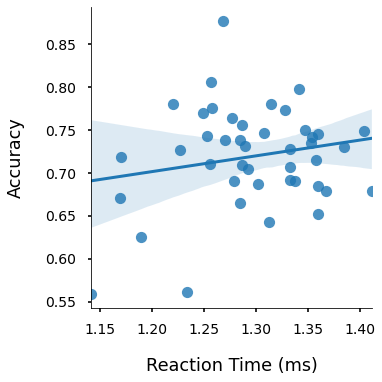

In [379]:
vis.corr_plot(df_rt_acc, x='rt', y= 'corr_resp', x_title= "Reaction Time (ms)", y_title= "Accuracy", save_title= "supp_fig1B.png")


### Test of correlation between average accuracy and reaction time

In [361]:
from scipy.stats import pearsonr
corr, p = pearsonr(df_rt_acc['corr_resp'], df_rt_acc['rt'])
corr, p



(0.19439210479793692, 0.21162536141305924)

#### Interpretation: There is a weak positive correlation between rt and accuracy. The reported Pearson correlation coefficient is insignificant. This association suggests no evidence of a participant speed-accuracy tradeoff, meaning that people did not slow their reaction times in order to achieve higher accuracy. 

# Suppl. Fig. 2 - Average Eye Movement Counts by Eye Movement Type


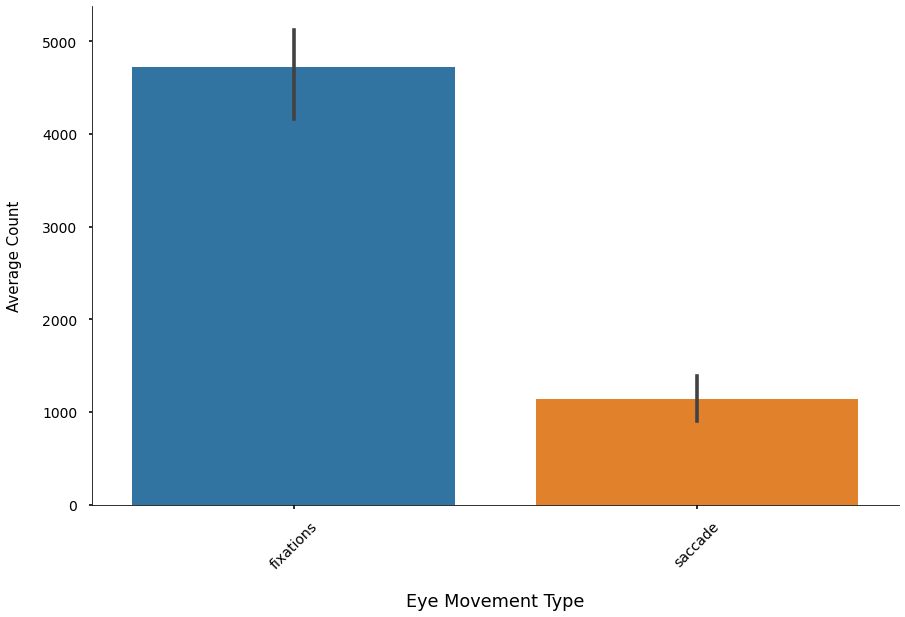

In [363]:
vis.plot_all_count(df_merged, x='type', hue=None, fig_title = None, save_title = "supp_fig2.png", x_title = "Eye Movement Type")

#avg number of counts across runs and sessions for each subject
#average count, error bars show variation between indiv. subjects

### t-test of significance for difference between average fixation and average saccade count

In [264]:
df_eyecount = df_merged.groupby(['subj', 'type'])["type"].count().reset_index(name='count') 
df_eyecount
fix_count = df_eyecount.query('type =="fixations"')['count']
saccade_count = df_eyecount.query('type == "saccade"')['count']
t, p = ttest_ind(fix_count, saccade_count)
print(f't(21)={t}, p={p}') 



t(21)=13.164844822575125, p=2.503339608439022e-15


## Suppl. Fig. 3
Plot: Saccade Count vs. Label

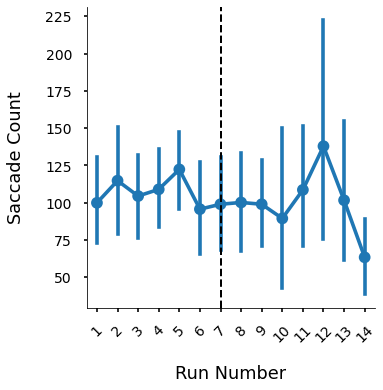

In [381]:
vis.plot_saccade_count(dataframe=df_merged, x='run_num', x_title = "Run Number", save_title= "supp_fig3.png")

### T-test of significance for saccade count differences between session 1 and session 2.

In [382]:
df_sacc_count = df_merged.groupby(['subj','sess', 'type'])["type"].count().reset_index(name='count').query('type=="saccade"')
df_sacc_count
sess1_sacc = df_fixcount.query('sess == 1')['count']
sess2_sacc = df_fixcount.query('sess == 2')['count']
t, p = ttest_ind(sess1_sacc, sess2_sacc)
print(f't(21)={t}, p={p}') 

t(21)=-1.232178789150228, p=0.22633577533584956


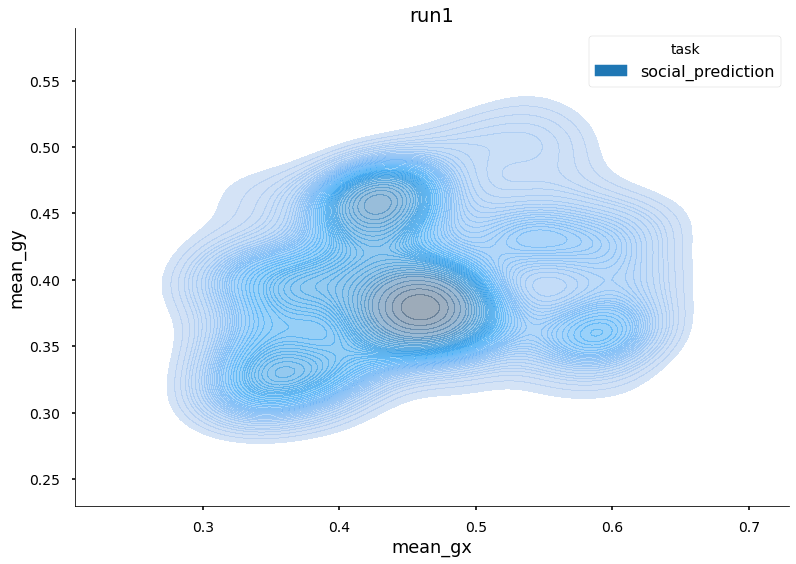

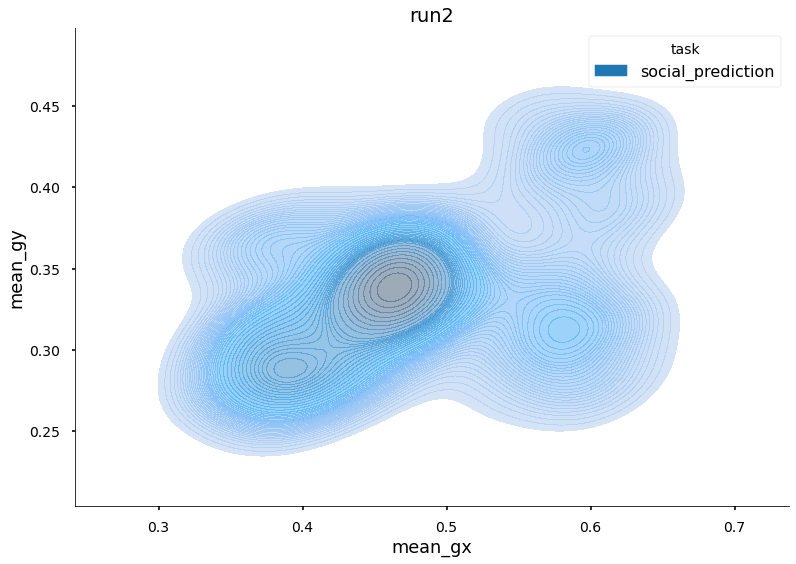

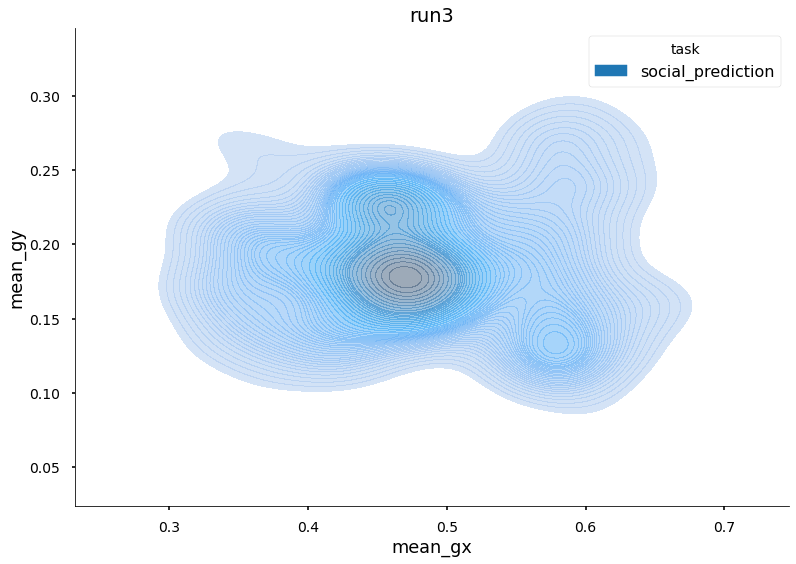

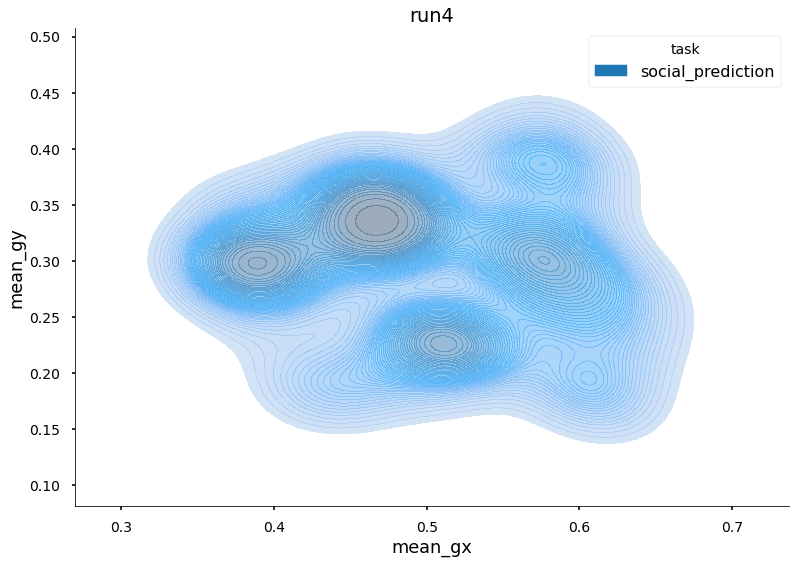

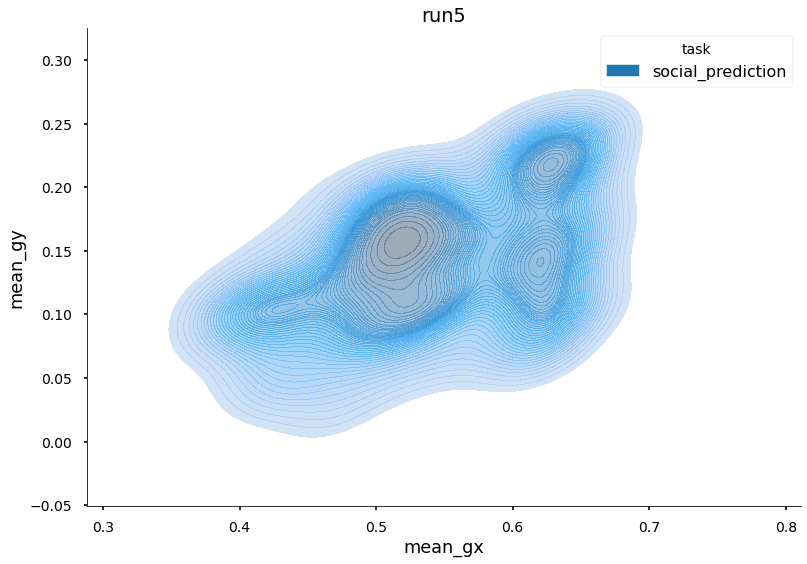

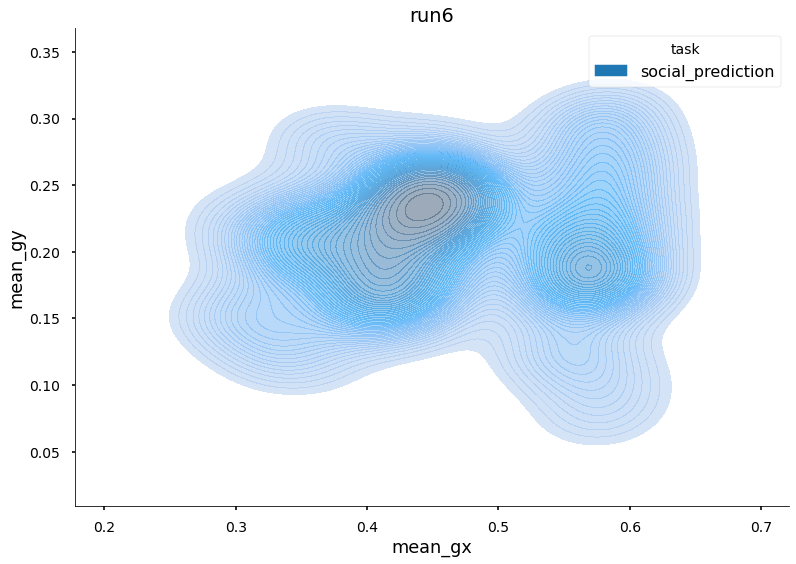

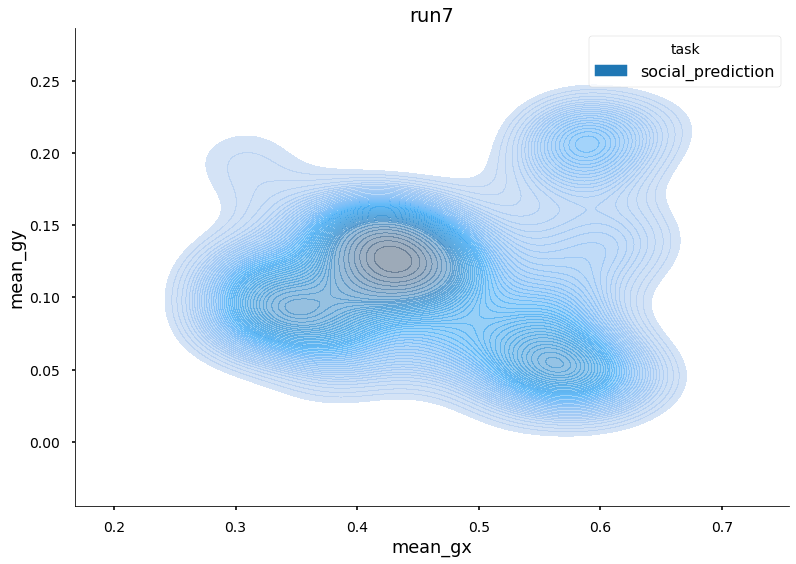

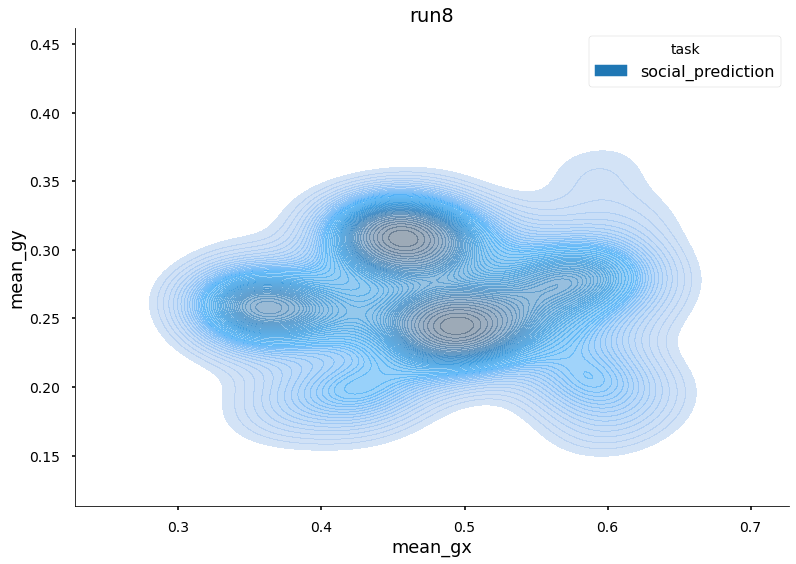

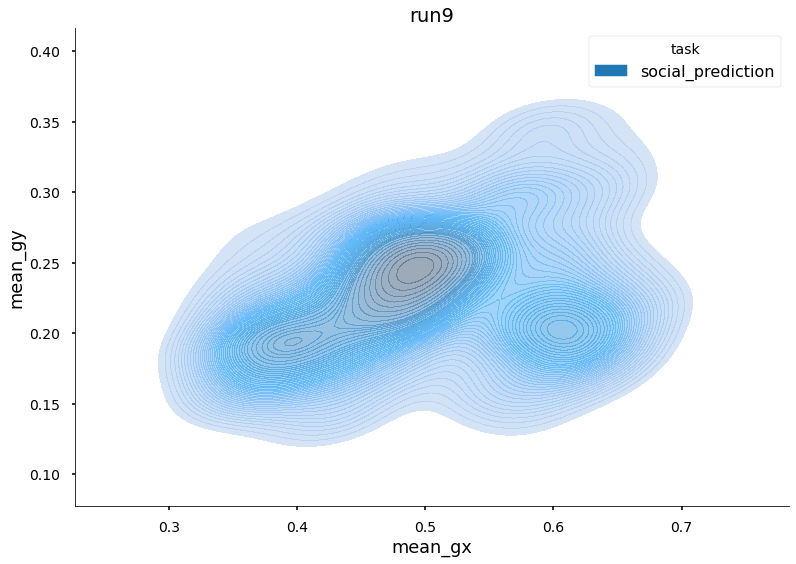

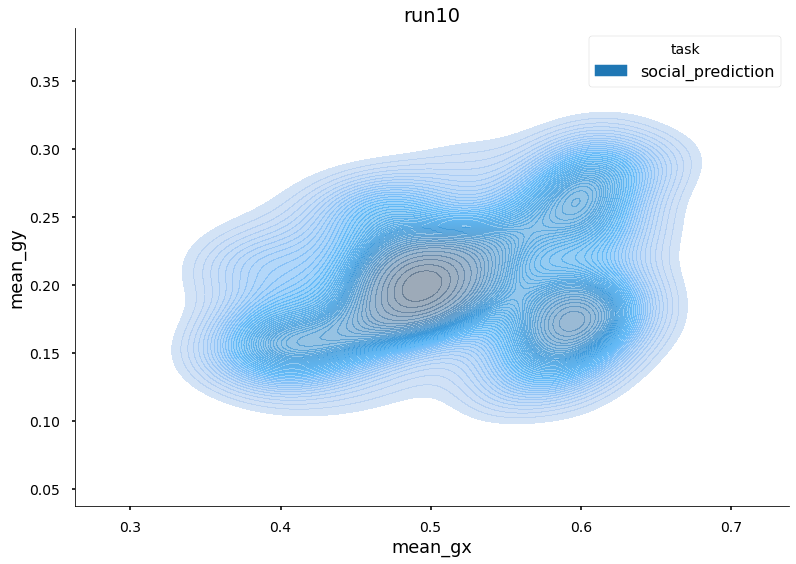

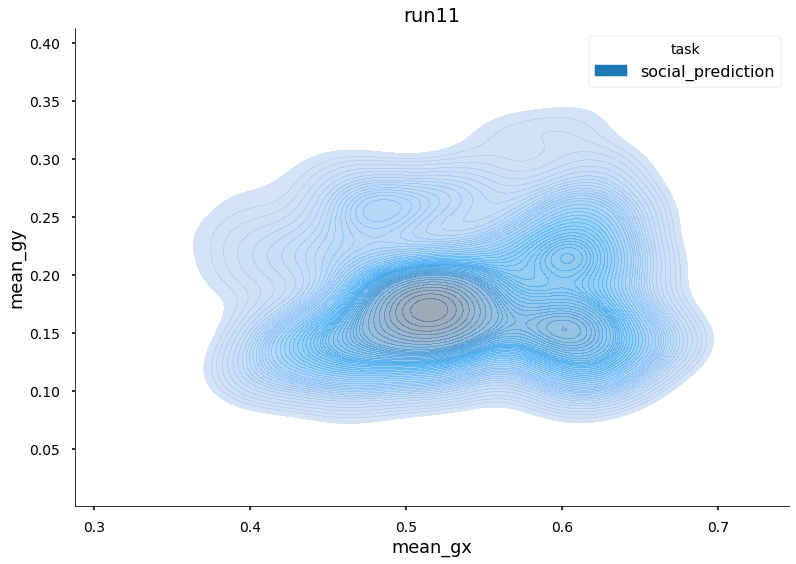

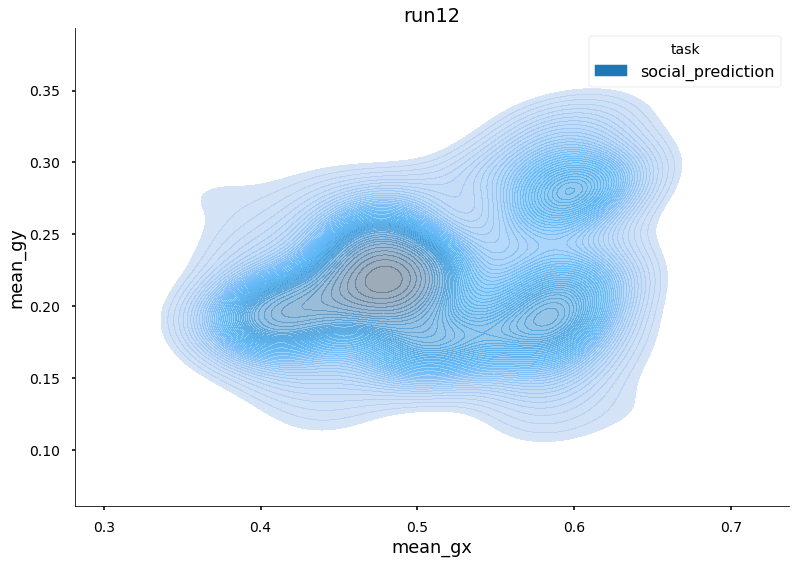

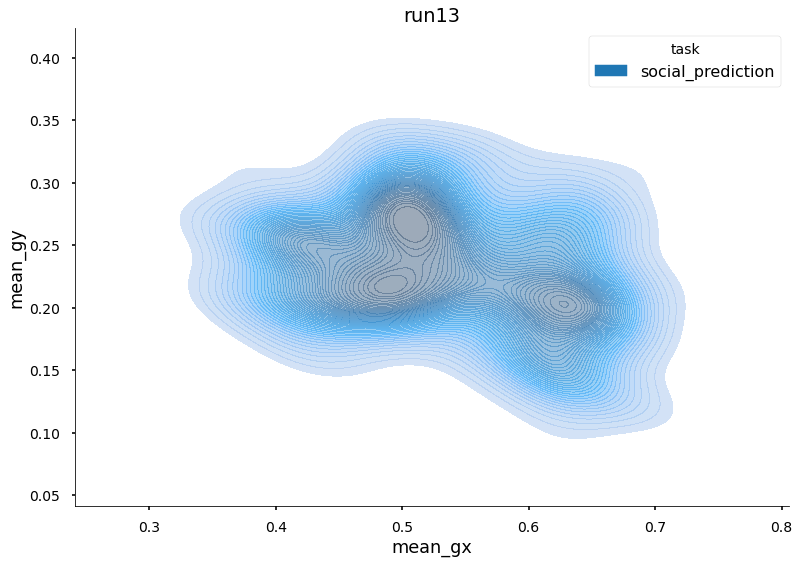

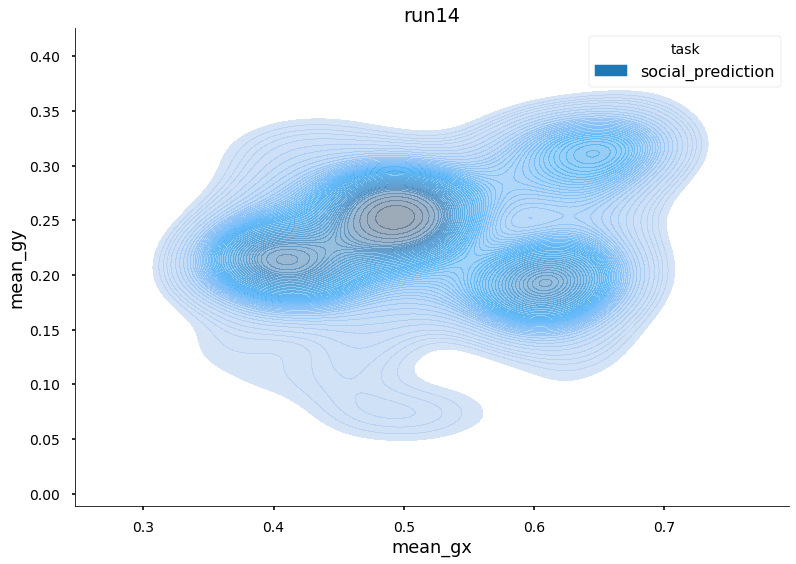

In [383]:
# heatmap
#goal: overlay average eye movement patterns 
# one subj, one run
for run in range(14):
    tmp = df_eye[(df_eye['subj']=='sIU') & (df_eye['run_num']==run+1) & (df_eye['type']=="fixations")]
    vis.plot_gaze_positions(dataframe=tmp)
    plt.title(f'run{run+1}')